Database-style DataFrame Merges

In [35]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1':range(7)})

In [3]:
df2 = DataFrame({'key': ['a', 'b', 'd'],'data2': range(3)})

In [5]:
pd.merge(df1,df2)

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [6]:
pd.merge(df1, df2, on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [7]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'], 'data1':range(7)})

In [8]:
df4 = DataFrame({'rkey':['a','b','d'],
                'data2':range(3)})

In [9]:
#By default merge does an 'inner' join
#Other possible options are 'left','right','outer'
pd.merge(df3,df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [10]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})

In [11]:
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'], 'data2':range(5)})

In [12]:
pd.merge(df1, df2, on='key', how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


In [13]:
pd.merge(df1, df2, how='inner')

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [14]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})

In [15]:
pd.merge(left,right,on=['key1','key2'],how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [16]:
pd.merge(left, right, on='key1')

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [17]:
pd.merge(left, right, on='key1', suffixes=('_left','_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


Merging on Index

In [18]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'], 'value':range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [19]:
pd.merge(left1, right1, left_on='key',right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [20]:
pd.merge(left1, right1, left_on='key',right_index=True, how='outer')

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [23]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})

In [24]:
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'], 
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [25]:
pd.merge(lefth, righth, left_on=['key1','key2'], right_index=True, how='outer')

,key1,key2,data,event1,event2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


In [26]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                  columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

In [27]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [28]:
left2.join(right2, how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


In [29]:
left1.join(right1, on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [30]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])

In [31]:
left2.join([right2,another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0


In [32]:
left2.join([right2, another], how='outer')

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0,9.0,10.0
e,5.0,6.0,13.0,14.0,11.0,12.0
b,NaN,NaN,7.0,8.0,NaN,NaN
d,NaN,NaN,11.0,12.0,NaN,NaN
f,NaN,NaN,NaN,NaN,16.0,17.0


Concatenating along an axis

In [33]:
arr = np.arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
np.concatenate([arr,arr],axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [36]:
s1 = Series([0,1], index=['a','b'])
s2 = Series([2,3,4], index=['c','d','e'])
s3 = Series([5,6], index=['f','g'])

In [37]:
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [39]:
pd.concat([s1,s2,s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [44]:
s4 = pd.concat([s1*5,s3])
print(s4)
s1

a    0
b    5
f    5
g    6
dtype: int64


a    0
b    1
dtype: int64

In [41]:
pd.concat([s1,s4],axis=1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [45]:
pd.concat([s1,s4], axis=1, join='inner')

,0,1
a,0,0
b,1,5


In [47]:
pd.concat([s1,s4], axis=1).reindex(['a','c','b','e'])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [48]:
#To make the concatenated pieces identifiable
result = pd.concat([s1,s2,s3], keys=['one','two','three'])
result

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [49]:
result.unstack()

,a,b,c,d,e,f,g
one,0.0,1.0,NaN,NaN,NaN,NaN,NaN
two,NaN,NaN,2.0,3.0,4.0,NaN,NaN
three,NaN,NaN,NaN,NaN,NaN,5.0,6.0


In [50]:
pd.concat([s1,s2,s3], axis=1, keys=['one','two','three'])

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [51]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                columns=['three', 'four'])

In [52]:
pd.concat([df1,df2], axis=1, keys=['level1','level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [53]:
pd.concat({'level1':df1,'level2':df2}, axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [54]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper','lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [55]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [56]:
pd.concat([df1,df2], ignore_index=True)

,a,b,c,d
0,-1.978743,0.648640,-0.262934,0.466386
1,1.822399,0.508394,0.670760,-0.325474
2,0.037617,1.082289,-0.170358,0.775305
3,-1.328188,1.966828,NaN,1.220884
4,-0.110343,0.133762,NaN,-1.120455


Combining Data with Overlap

In [57]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])

In [58]:
b[-1] = np.nan

In [63]:
type(np.where(pd.isnull(a), b, a))

numpy.ndarray

In [64]:
#"patching" missing data in the calling object with data from object passed
b[:-2].combine_first(a[2:])

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [65]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})

In [66]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


Reshaping and Pivoting

Reshaping with Hierarchical Indexing

In [67]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))

In [68]:
result = data.stack()

In [70]:
#by default the innermost level is unstacked
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [71]:
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [72]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [73]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [74]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [75]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [76]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [79]:
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [78]:
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [80]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [81]:
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

Pivoting "long" to "wide" format

In [82]:
#'pivot' is just a shortcut for creating a hierarchical index using set_index
#and reshaping with unstack

Data Transformation

Filtering, cleaning, and other transformations

Removing Duplicates

In [83]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [85]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [86]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


In [88]:
data.drop_duplicates(['k1','k2'], keep='last')

,k1,k2,v1
1,one,1,1
2,one,2,2
4,two,3,4
6,two,4,6


Transforming Data using a function or mapping

In [89]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [99]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

In [100]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)

In [101]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

Replacing values

In [102]:
data = Series([1., -999., 2., -999., -1000., 3.])

In [103]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [104]:
data.replace([-999,1000],np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [105]:
data.replace([-999,1000],[np.nan,0])

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [106]:
data.replace({-999:np.nan,1000:0})

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

Renaming axis indexes

In [107]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [108]:
data.index.map(str.upper)

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [109]:
data.index = data.index.map(str.upper)

In [110]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [111]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [112]:
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [113]:
data.rename(index={'OHIO': 'INDIANA'},columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [114]:
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)

In [116]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


Discretization and binning

Continuous data is often discretized or otherwised separated into “bins” for analysis.

In [117]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [118]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages,bins)

In [119]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [123]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [124]:
pd.cut(ages, [18,26,36,61,100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [125]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [126]:
data = np.random.rand(20)

In [127]:
pd.cut(data,4,precision=2)

[(0.028, 0.27], (0.75, 0.99], (0.028, 0.27], (0.75, 0.99], (0.75, 0.99], ..., (0.27, 0.51], (0.27, 0.51], (0.27, 0.51], (0.75, 0.99], (0.27, 0.51]]
Length: 20
Categories (4, interval[float64]): [(0.028, 0.27] < (0.27, 0.51] < (0.51, 0.75] < (0.75, 0.99]]

In [128]:
data = np.random.randn(1000)

In [129]:
cats = pd.qcut(data,4) # Cut into quantiles

In [130]:
cats

[(0.702, 2.985], (-0.707, 0.0474], (-3.6149999999999998, -0.707], (0.702, 2.985], (0.702, 2.985], ..., (0.702, 2.985], (-0.707, 0.0474], (-0.707, 0.0474], (-0.707, 0.0474], (-3.6149999999999998, -0.707]]
Length: 1000
Categories (4, interval[float64]): [(-3.6149999999999998, -0.707] < (-0.707, 0.0474] < (0.0474, 0.702] < (0.702, 2.985]]

In [131]:
pd.value_counts(cats)

(0.702, 2.985]                   250
(0.0474, 0.702]                  250
(-0.707, 0.0474]                 250
(-3.6149999999999998, -0.707]    250
dtype: int64

In [132]:
pd.qcut(data,[0, 0.1, 0.5, 0.9, 1.])

[(0.0474, 1.274], (-1.312, 0.0474], (-1.312, 0.0474], (0.0474, 1.274], (1.274, 2.985], ..., (0.0474, 1.274], (-1.312, 0.0474], (-1.312, 0.0474], (-1.312, 0.0474], (-1.312, 0.0474]]
Length: 1000
Categories (4, interval[float64]): [(-3.6149999999999998, -1.312] < (-1.312, 0.0474] < (0.0474, 1.274] < (1.274, 2.985]]

In [133]:
pd.value_counts(pd.qcut(data,[0, 0.1, 0.5, 0.9, 1.]))

(0.0474, 1.274]                  400
(-1.312, 0.0474]                 400
(1.274, 2.985]                   100
(-3.6149999999999998, -1.312]    100
dtype: int64

Detecting and filtering outliers

In [134]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000,4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [135]:
col = data[3]
col[np.abs(col)>3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [138]:
data[(np.abs(data)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [140]:
data[(np.abs(data)>3)][:6]

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,3.248944,NaN


In [141]:
# to cap values outside the interval -3 to 3
data[np.abs(data)>3]=np.sign(data)*3

In [142]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


Permutation and random sampling

In [143]:
df = DataFrame(np.arange(5 * 4).reshape(5, 4))

In [144]:
sampler = np.random.permutation(5)

In [145]:
sampler

array([1, 0, 2, 3, 4])

In [146]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [147]:
# To select a random subset without replacement, one way is to slice off the
# first k elements of the array returned by permutation, where k is the desired sample size
df.take(np.random.permutation(len(df))[:3])

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
4,16,17,18,19


In [148]:
# To generate a sample with replacement
# the fastest way is to use np.random.randint to draw random integers
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10)
sampler

array([4, 4, 2, 2, 2, 0, 3, 0, 4, 1])

In [149]:
draws = bag.take(sampler)
draws

array([ 4,  4, -1, -1, -1,  5,  6,  5,  4,  7])

Computing indicator/Dummy variables

In [150]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [151]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [152]:
mnames = ['movie_id', 'title', 'genres']

In [153]:
pwd

'C:\\Users\\yuqia\\pydata-book'

In [154]:
cd datasets

C:\Users\yuqia\pydata-book\datasets


In [155]:
cd movielens

C:\Users\yuqia\pydata-book\datasets\movielens


In [157]:
movies = pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python')
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [158]:
genre_iter = (set(x.split('|')) for x in movies['genres'])

In [159]:
type(genre_iter)

generator

In [160]:
genres=sorted(set.union(*genre_iter))

In [161]:
dummies = DataFrame(np.zeros((len(movies), len(genres))),columns=genres)

In [165]:
for i, gen in enumerate(movies.genres):
    dummies.loc[i, gen.split('|')]=1

In [166]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))

In [167]:
movies_windic.iloc[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [168]:
values = np.random.rand(10)

In [169]:
values

array([0.75603383, 0.90830844, 0.96588737, 0.17373658, 0.87592824,
       0.75415641, 0.163486  , 0.23784062, 0.85564381, 0.58743194])

In [170]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [171]:
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,0,0,1
5,0,0,0,1,0
6,1,0,0,0,0
7,0,1,0,0,0
8,0,0,0,0,1
9,0,0,1,0,0


String Manipulation

String object methods

In [173]:
val = 'a,b, guido'

In [174]:
val.split(',')

['a', 'b', ' guido']

In [176]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [177]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [178]:
first, second, third = pieces

In [179]:
first + '::' + second + '::' + third

'a::b::guido'

In [180]:
'::'.join(pieces)

'a::b::guido'

In [181]:
'guido' in val

True

In [183]:
val.index(',')

1

In [184]:
val.find(':')

-1

In [185]:
val.index(':')

ValueError: substring not found

In [186]:
val.count(',')

2

In [187]:
val.replace(',','::')

'a::b:: guido'

In [188]:
val.replace(',','')

'ab guido'

Regular Expressions

In [189]:
import re

In [190]:
text = "foo bar\t baz \tqux"

In [191]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [192]:
regex = re.compile('\s+')

In [193]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [194]:
regex.findall(text)

[' ', '\t ', ' \t']

In [195]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [196]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [197]:
type(regex)

re.Pattern

In [198]:
m = regex.search(text)
m

<re.Match object; span=(5, 20), match='dave@google.com'>

In [199]:
text[m.start():m.end()]

'dave@google.com'

In [200]:
print(regex.match(text))

None


In [201]:
print(regex.sub('REDACTED',text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [202]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [203]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [204]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [205]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



In [206]:
type(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

str

In [207]:
regex = re.compile(r"""
(?P<username>[A-Z0-9._%+-]+)
@
(?P<domain>[A-Z0-9.-]+)
\.
(?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

In [208]:
m = regex.match('wesm@bright.net')

In [209]:
m.groupdict()

{'username': 'wesm', 'domain': 'bright', 'suffix': 'net'}

Vectorized string functions in pandas

In [210]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)

In [211]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [212]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [213]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [215]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [219]:
matches = data.str.findall(pattern, flags=re.IGNORECASE)
matches

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

In [218]:
type(matches)

pandas.core.series.Series

In [230]:
type(matches.str[0])

pandas.core.series.Series

In [231]:
matches = matches.str[0]

In [232]:
matches.str.get(1)

Dave     google
Steve     gmail
Rob       gmail
Wes         NaN
dtype: object

In [233]:
data.str[:5]

Dave     dave@
Steve    steve
Rob      rob@g
Wes        NaN
dtype: object

Example: USDA food database

In [234]:
pwd

'C:\\Users\\yuqia\\pydata-book\\datasets\\movielens'

In [235]:
cd -

C:\Users\yuqia\pydata-book\datasets


In [236]:
cd datasets

[WinError 2] The system cannot find the file specified: 'datasets'
C:\Users\yuqia\pydata-book\datasets


In [237]:
cd usda_food

C:\Users\yuqia\pydata-book\datasets\usda_food


In [238]:
import json
db = json.load(open('database.json'))

In [239]:
len(db)

6636

In [245]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [246]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [247]:
nutrients = DataFrame(db[0]['nutrients'])

In [248]:
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [249]:
info_keys = ['description','group','id','manufacturer']
info = DataFrame(db, columns=info_keys)

In [250]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [251]:
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [252]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Fast Foods                           365
Legumes and Legume Products          365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [271]:
nutrients = []
for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [272]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [273]:
nutrients.duplicated().sum()

14179

In [274]:
nutrients = nutrients.drop_duplicates()

In [275]:
col_mapping1 = {'description' : 'food',
              'group' : 'fgroup'}
col_mapping2 = {'description' : 'nutrient',
               'group' : 'nutgroup'}
info = info.rename(columns=col_mapping1, copy=False)
nutrients = nutrients.rename(columns=col_mapping2, copy=False)

In [276]:
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [277]:
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [278]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [279]:
ndata

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.280,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
375171,0.000,mcg,"Vitamin B-12, added",Vitamins,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375172,0.000,mg,Cholesterol,Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375173,0.072,g,"Fatty acids, total saturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375174,0.028,g,"Fatty acids, total monounsaturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None


In [280]:
result = ndata.groupby(['nutrient','fgroup'])['value'].quantile(0.5)

In [281]:
result

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64

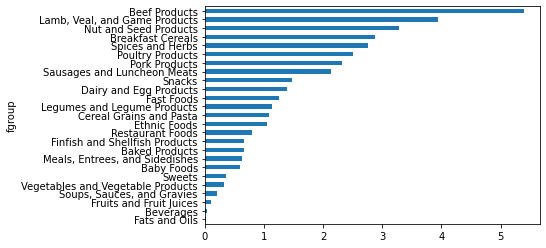

In [283]:
result['Zinc, Zn'].sort_values().plot(kind='barh')

In [290]:
#find which food is most dense in each nutrient
by_nutrient = ndata.groupby(['nutgroup','nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)

max_foods.food = max_foods.food.str[:50]

In [291]:
max_foods.loc['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

In [292]:
max_foods

value units  \
nutgroup    nutrient                                       
Amino Acids Alanine                          8.009     g   
            Arginine                         7.436     g   
            Aspartic acid                   10.203     g   
            Cystine                          1.307     g   
            Glutamic acid                   17.452     g   
...                                            ...   ...   
Vitamins    Vitamin D2 (ergocalciferol)     28.100   mcg   
            Vitamin D3 (cholecalciferol)    27.400   mcg   
            Vitamin E (alpha-tocopherol)   149.400    mg   
            Vitamin E, added                46.550    mg   
            Vitamin K (phylloquinone)     1714.500   mcg   

                                                              nutrient  \
nutgroup    nutrient                                                     
Amino Acids Alanine                                            Alanine   
            Arginine                                          Arginine   
            Aspartic acid                                Aspartic acid   
            Cystine                                            Cystine   
            Glutamic acid                                Glutamic acid   
...                                                                ...   
Vitamins    Vitamin D2 (ergocalciferol)    Vitamin D2 (ergocalciferol)   
            Vitamin D3 (cholecalciferol)  Vitamin D3 (cholecalciferol)   
            Vitamin E (alpha-tocopherol)  Vitamin E (alpha-tocopherol)   
            Vitamin E, added                          Vitamin E, added   
            Vitamin K (phylloquinone)        Vitamin K (phylloquinone)   

                                             nutgroup     id  \
nutgroup    nutrient                                           
Amino Acids Alanine                       Amino Acids  19177   
            Arginine                      Amino Acids  12033   
            Aspartic acid                 Amino Acids  16122   
            Cystine                       Amino Acids  12008   
            Glutamic acid                 Amino Acids  16122   
...                                               ...    ...   
Vitamins    Vitamin D2 (ergocalciferol)      Vitamins  11993   
            Vitamin D3 (cholecalciferol)     Vitamins  15038   
            Vitamin E (alpha-tocopherol)     Vitamins   4038   
            Vitamin E, added                 Vitamins   8087   
            Vitamin K (phylloquinone)        Vitamins   2038   

                                                                                       food  \
nutgroup    nutrient                                                                          
Amino Acids Alanine                                       Gelatins, dry powder, unsweetened   
            Arginine                                           Seeds, sesame flour, low-fat   
            Aspartic acid                                               Soy protein isolate   
            Cystine                            Seeds, cottonseed flour, low fat (glandless)   
            Glutamic acid                                               Soy protein isolate   
...                                                                                     ...   
Vitamins    Vitamin D2 (ergocalciferol)                             Mushrooms, maitake, raw   
            Vitamin D3 (cholecalciferol)                      Fish, halibut, Greenland, raw   
            Vitamin E (alpha-tocopherol)                                    Oil, wheat germ   
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...   
            Vitamin K (phylloquinone)                                  Spices, sage, ground   

                                                                     fgroup  \
nutgroup    nutrient                                                          
Amino Acids Alanine                                                  Sweet